In [1]:
from tsp_annealing import *
import matplotlib.pyplot as plt
import json

# Additional functions

In [2]:
def plot_TSP_solution(cities, permutation_method, opt_solution=None, **kwargs):
    plt.figure(figsize=(8, 6))
    plt.scatter([elem[0] for elem in cities], [elem[1] for elem in cities])
    plt.title('Map')

    distances = calculate_distances(cities)

    best_tour, best_distance, cost_over_iterations, temperature_over_interations, count = perform_annealing(distances, 
                                                                    altering_method=permutation_method, output_count=True, **kwargs)

    print("Best tour:", best_tour)
    print("Best distance:", best_distance)

    plot_tour(best_tour, cities, permutation_method)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(cost_over_iterations)
    if opt_solution is not None:
        opt_line = [opt_solution for _ in range(len(cost_over_iterations))]
        plt.plot(opt_line, linestyle='--', color='black')
    plt.title('Tour Distance Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Distance')
    plt.show()

    plt.plot(temperature_over_interations)
    plt.title('Temperature Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Temperature')

    plt.show()
    print('annealing iterations:', count)



def metrics(cities, permutation_method, print_results=True, **kwargs):
    distances = calculate_distances(cities)

    best_tour, best_tour_distance, _, _ = perform_annealing(distances, altering_method=permutation_method, **kwargs)

    best_tour_coordinates = tour_to_cities(best_tour, cities)

    if print_results:
        print('Method = \'%s\''%(permutation_method))
        print("Best distance:", best_tour_distance)
        print('With %i intersections \n'%(count_intersections(best_tour_coordinates)))
    
    return best_tour_distance, count_intersections(best_tour_coordinates)

def plot_dist_and_temp(costs, temps, title=None):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].set_title('Distance over iterations')
    axs[0].plot(costs)
    axs[1].set_title('Temperature')
    axs[1].plot(temps)
    if title is not None:
        fig.suptitle(title)
    plt.show()


def plot_comparison(results: dict, max_iterations_list, param_labels, opt_distance = None):
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'darkgreen', 'magenta']

    for i, param_label in enumerate(param_labels):
        means = np.array([np.mean(elem) for elem in results[param_label]])
        stds = np.array([np.std(elem) for elem in results[param_label]])
        z_score = 1.96 

        conf_intervals = np.column_stack([
        means - z_score * (stds / np.sqrt(len(means))),
        means + z_score * (stds / np.sqrt(len(means)))
        ])

        lower_bounds = np.array([interval[0] for interval in conf_intervals])
        upper_bounds = np.array([interval[1] for interval in conf_intervals])

        plt.plot(max_iterations_list, means, marker='o', linestyle='-', color=colors[i], label=param_label)
        plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.3)
    
    if opt_distance is not None:
        opt_distance_line = [opt_distance for _ in max_iterations_list]
        plt.plot(max_iterations_list, opt_distance_line, linestyle='--', color='black', label='Optimal Distance')
        
    #plt.title('Mean Distance over Number of Max Iterations')
    plt.xlabel(r'$N_{iter}$')
    plt.ylabel(r'$\overline{D}$')
    plt.legend()

# Loading data

In [3]:
opt_distance_51, opt_distance_280, opt_distance_442 = calculate_optimal_distances()

cities_51 = load_graph('TSP-Configurations/eil51.tsp.txt')
cities_280 = load_graph('TSP-Configurations/a280.tsp.txt')
cities_442 = load_graph('TSP-Configurations/pcb442.tsp.txt')

distances_51 = calculate_distances(cities_51)
distances_280 = calculate_distances(cities_280)
distances_442 = calculate_distances(cities_442)

# Permutation operators

Averaged comparison between best results using different permutation operators

In [4]:
cities = load_graph('TSP-Configurations/a280.tsp.txt')

methods = ['swap', 'insert', 'reverse']
num_runs = 50

kwargs_list = []
for method in methods:
    kwargs_list.append({   
            'num_runs': num_runs,
            'distances': distances_280,
            'altering_method': method,
            'max_iterations': int(1E6),
            'final_temp': 1E-10,
            'output': 'fitness_statistics'
        }
    )

output = run_concurrent(run_simulations, kwargs_list);

for (elem, method) in zip(output, methods):
    print(f'Mean distance using {method}: {elem[0]})')
    print('CI:', elem[2])
    print('Error:', elem[0] - opt_distance_280)
    print()


KeyboardInterrupt: 

In [47]:
""" A possible way to justify num_runs """

CI_radius_swap = (output[0][2][1] - output[0][2][0]) / 2
mean_distance_swap = output[0][0]
ratio_swap = CI_radius_swap / mean_distance_swap

CI_radius_insert = (output[1][2][1] - output[1][2][0]) / 2
mean_distance_insert = output[1][0]
ratio_insert = CI_radius_insert / mean_distance_insert

CI_radius_reverse = (output[2][2][1] - output[2][2][0]) / 2
mean_distance_reverse = output[2][0]
ratio_reverse = CI_radius_reverse / mean_distance_reverse

print(f'swap: CI_r / mean = {round(ratio_swap * 100, 5)}%')
print(f'insert: CI_r / mean = {round(ratio_insert * 100, 5)}%')
print(f'reverse: CI_r / mean = {round(ratio_reverse * 100, 5)}%')


swap: CI_r / mean = 1.14617%
insert: CI_r / mean = 1.13874%
reverse: CI_r / mean = 0.7227%


Best tour: [21 27 30 25  6 22 47  7 45 11 14 44 33 29 49 10 31  0 26 43 36 46 50  5
 42 23 13 24 12 18 39 40  3 17 16 41 32 38  9 48  4 37  8 19  2 35 34 28
 20 15  1]
Best distance: 608.1329336520885


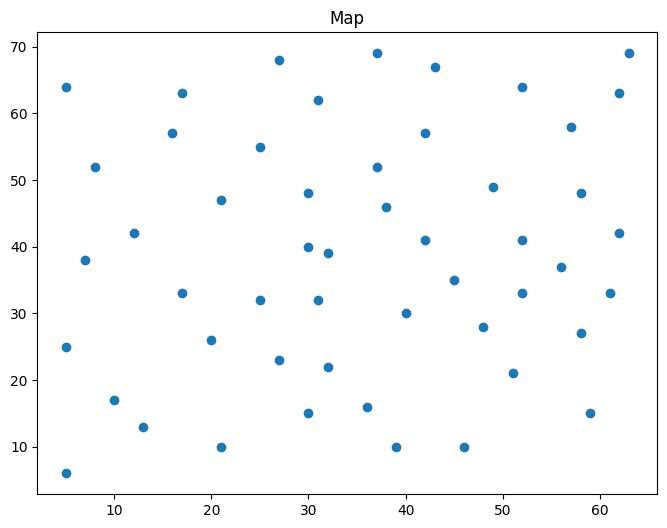

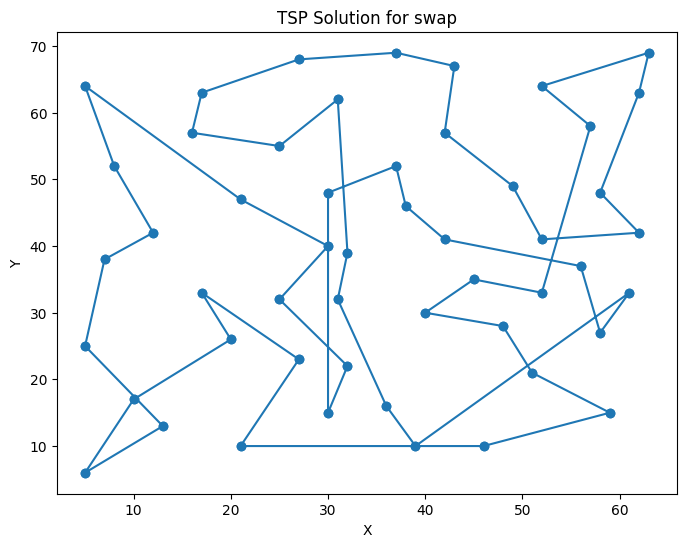

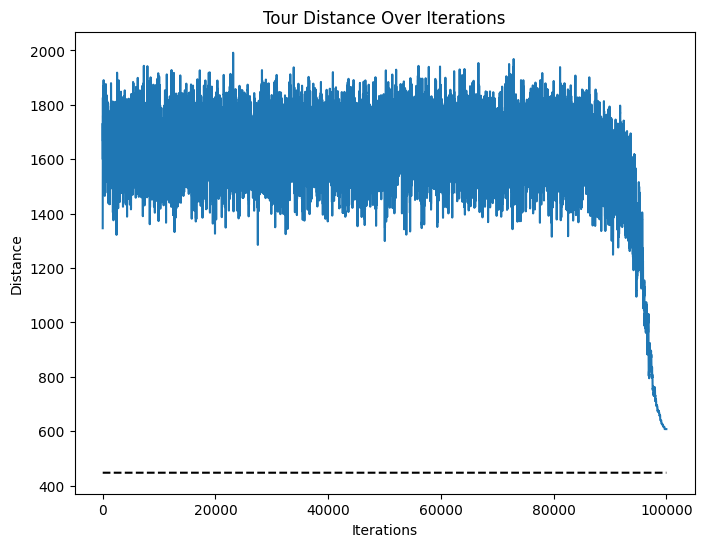

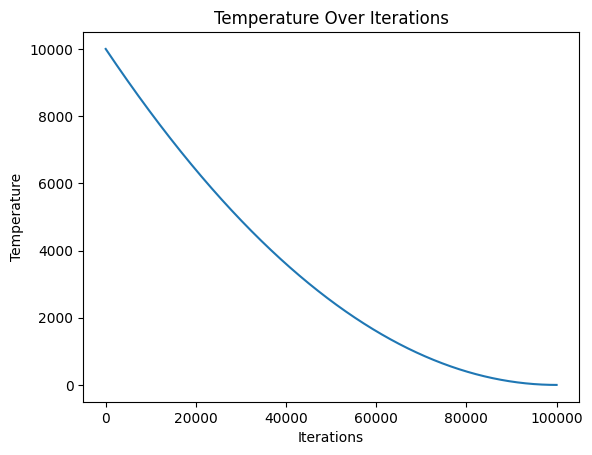

Best tour: [14, 44, 32, 38, 29, 33, 1, 31, 50, 45, 26, 5, 47, 6, 22, 42, 23, 13, 24, 12, 40, 39, 18, 41, 9, 48, 8, 49, 10, 0, 21, 7, 25, 30, 27, 2, 19, 35, 34, 28, 20, 15, 37, 4, 11, 46, 17, 3, 16, 36, 43]
Best distance: 494.03775412574925


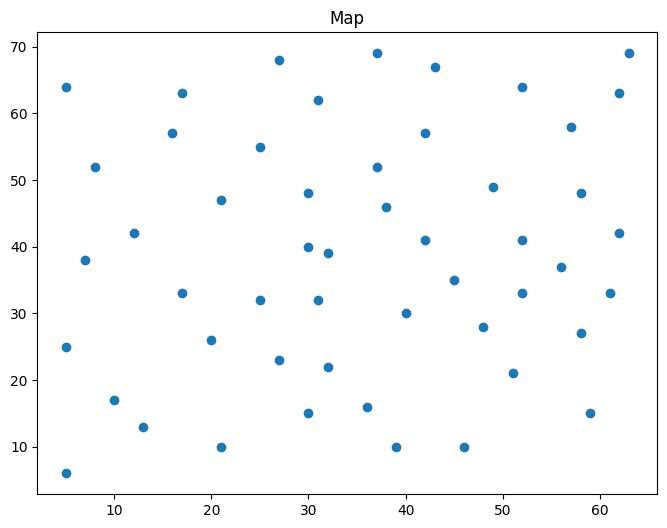

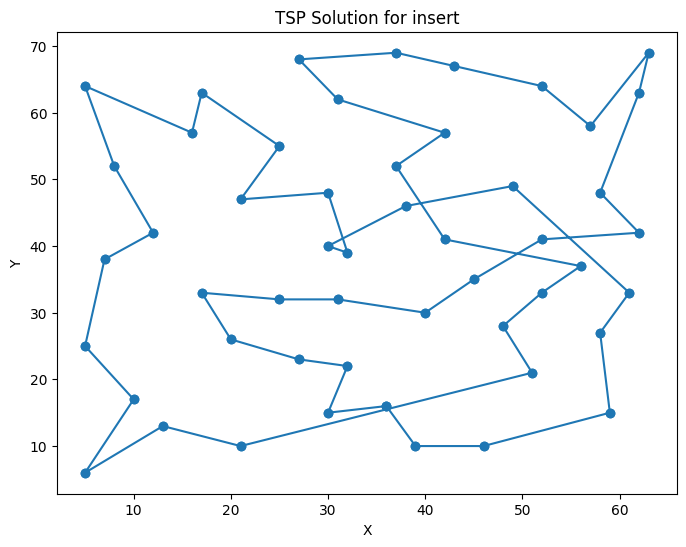

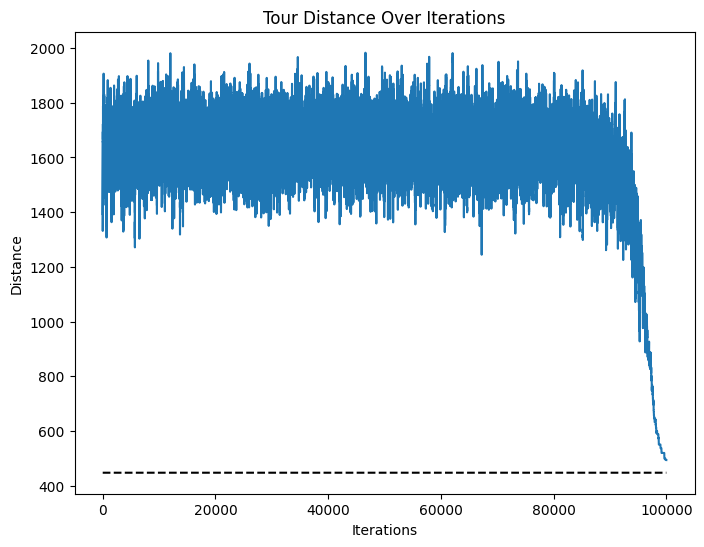

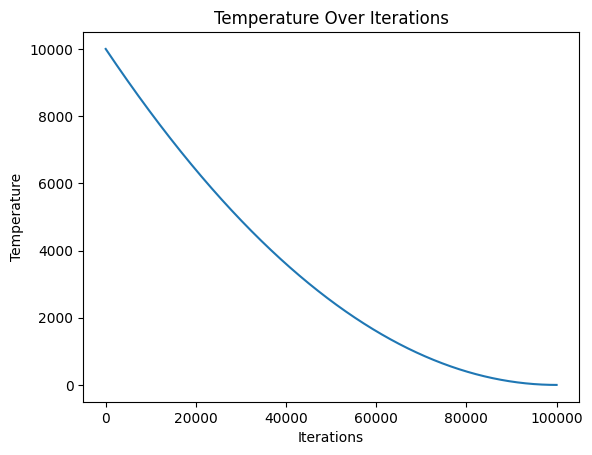

Best tour: [18 41 16 43 44 32 14 36 11  4 37  8 48  9 38 29 33 15 49 20 28  1 21  2
 19 34 35 27 30 25  6 42 23 22 47  5 26  7  0 31 10 45 50 46  3 17 13 24
 12 40 39]
Best distance: 475.73478653211424


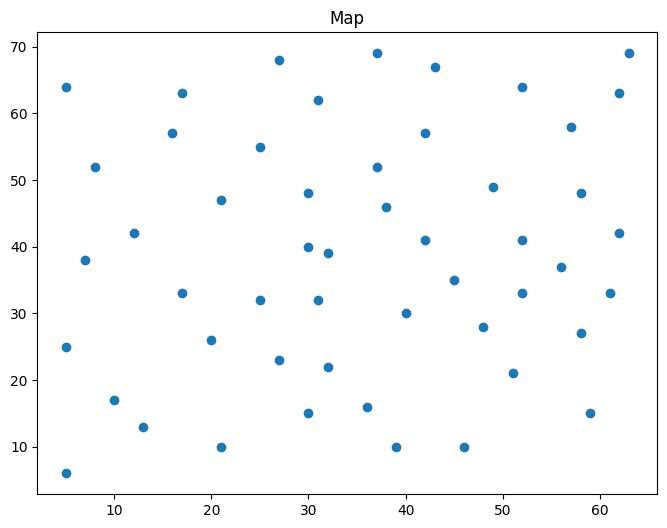

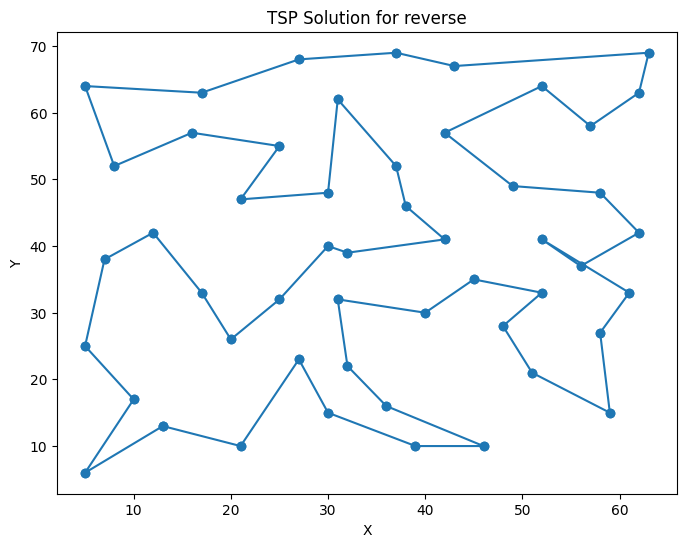

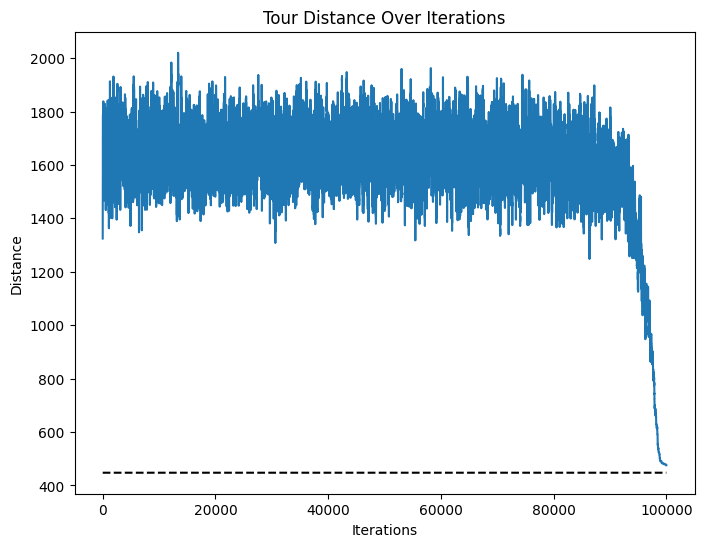

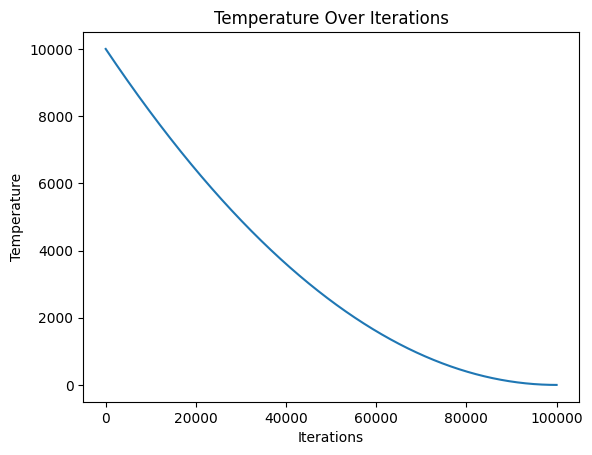

In [54]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')

max_iterations = int(1E5) 
final_temp = 1E-6
cooling_schedule = 'quadratic_a'
alpha = 1 - 1E-7

plot_TSP_solution(cities, 'swap',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha, opt_solution=opt_distance_51)
plot_TSP_solution(cities, 'insert',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha, opt_solution=opt_distance_51)
plot_TSP_solution(cities, 'reverse',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha, opt_solution=opt_distance_51)

# Cooling schedules

cooling schedule:  linear_m
best_energy: 3608.772505482114
performed iterations: 50000


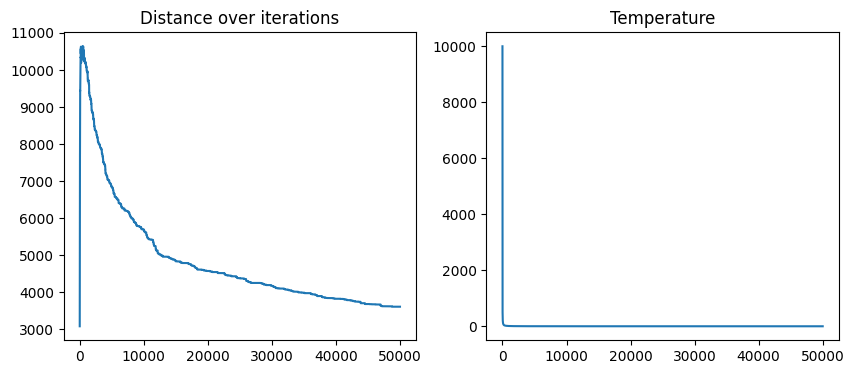

cooling schedule:  exponential_m
best_energy: 34780.66140608842
performed iterations: 50000


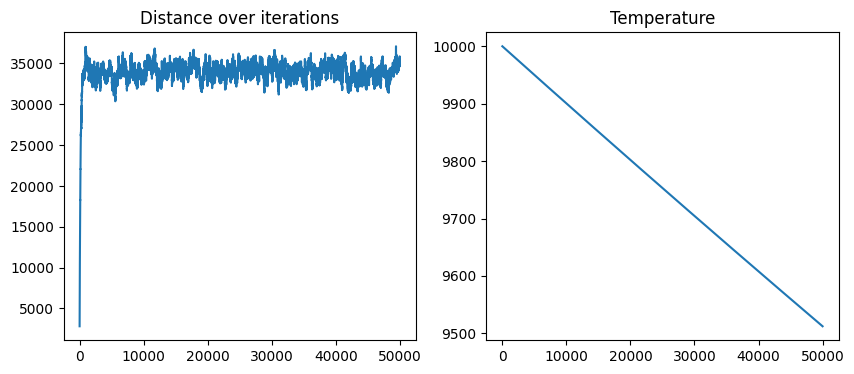

cooling schedule:  logarithmic_m
best_energy: 32548.510102333556
performed iterations: 50000


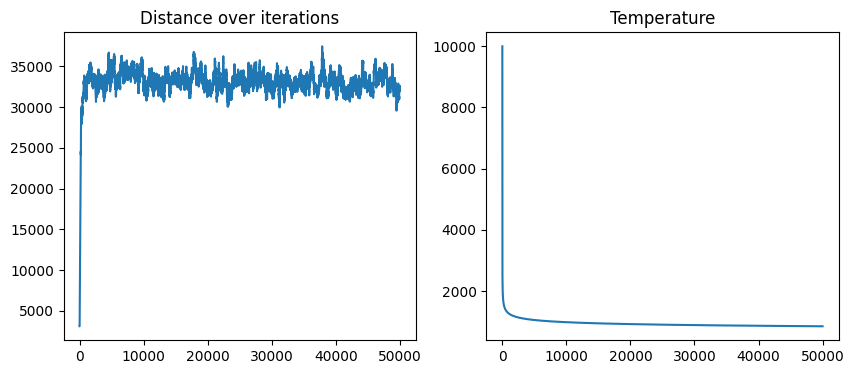

cooling schedule:  linear_a
best_energy: 22290.734738534044
performed iterations: 50000


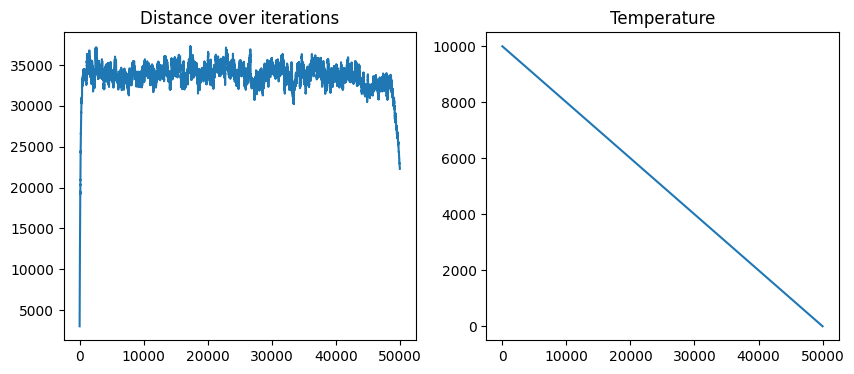

cooling schedule:  quadratic_a
best_energy: 10937.987742844653
performed iterations: 50000


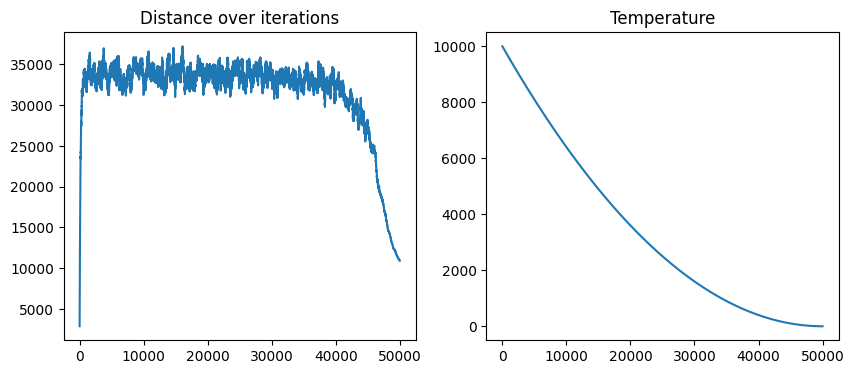

In [14]:
""" x axis values are not set """

schedules = ['linear_m', 'exponential_m', 'logarithmic_m', 'linear_a', 'quadratic_a']

for schedule in schedules:
    _ , best_energy, costs, temps, count = perform_annealing(distances=distances_280, cooling_schedule=schedule, final_temp=1E-5,
                                                        alpha = 1 - 1E-6, chain_length=1, max_iterations=50000, output_count=True)
    print('cooling schedule: ', schedule)
    print('best_energy:', best_energy)
    print('performed iterations:', count)
    plot_dist_and_temp(costs, temps)

cooling schedule:  dynamic_m
best_energy: 5748.963081553041
performed iterations: 50000


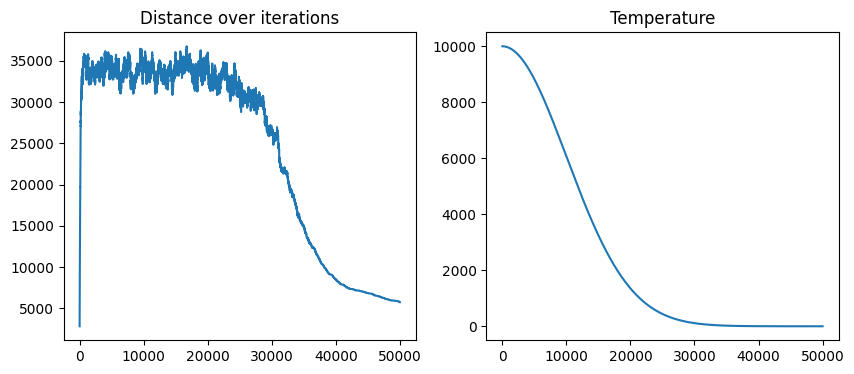

In [11]:
schedules = ['dynamic_m']

for schedule in schedules:
    _ , best_energy, costs, temps, count = perform_annealing(distances=distances_280, cooling_schedule=schedule, final_temp=1E-7,
                                                        alpha = 1 - 1E-8, chain_length=1, max_iterations=50000, output_count=True)
    print('cooling schedule: ', schedule)
    print('best_energy:', best_energy)
    print('performed iterations:', count)
    plot_dist_and_temp(costs, temps)

cooling schedule:  quadratic_m
best_energy: 3035.946046355159
performed iterations: 3


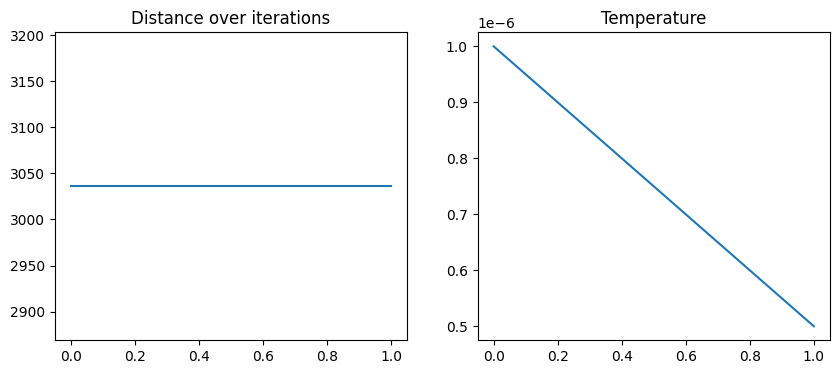

In [10]:
"""
broken
"""

schedules = ['quadratic_m']

for schedule in schedules:
    _ , best_energy, costs, temps, count = perform_annealing(distances=distances_280, cooling_schedule=schedule, final_temp=1E-6,
                                                        alpha = 1 - 1E-7, chain_length=1, max_iterations=50000, output_count=True)
    print('cooling schedule: ', schedule)
    print('best_energy:', best_energy)
    print('performed iterations:', count)
    plot_dist_and_temp(costs, temps)

# Chain length

# Max iterations analysis

In [13]:
distances = distances_280
max_iterations_list = range(100, 100000, 10000)
num_runs = 20
final_temp = 1E-6
cooling_schedule = 'linear_m'
alpha = 1 - 1E-5
permutation_method = 'reverse'

opt_distance_line = [opt_distance_280 for _ in max_iterations_list]

means, stds, conf_intervals = run_vary_maxiter_concurrent(num_runs, distances, max_iterations_list, altering_method = permutation_method,
                                                          final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha)

Time taken with concurrency: 385.630309343338 seconds


In [220]:
distances = distances_280
max_iterations_list = range(1, 40100, 5000)
num_runs = 50
final_temp = 1E-3
initial_temp = 1E6
cooling_schedule = 'linear_m'
alpha = 1
permutation_methods = ['swap', 'insert', 'reverse']

results_vary_permutation = {} 

for perm_method in permutation_methods:
    print('running for perm_method:', perm_method)
    output = run_vary_maxiter_concurrent_sims(num_runs, distances, max_iterations_list, output='final_fitnesses', altering_method = perm_method,
                                                            final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha, initial_temp=initial_temp)
    results_vary_permutation[perm_method] = output

running for perm_method: swap


KeyboardInterrupt: 

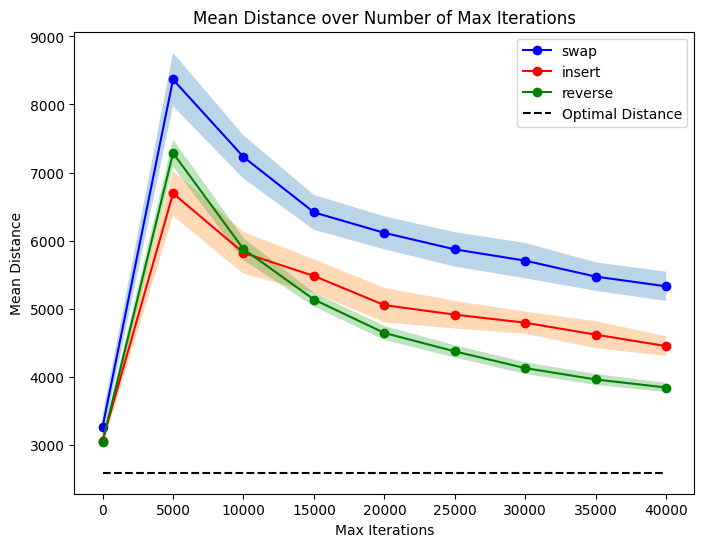

In [8]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']

opt_distance_line = [opt_distance_280 for _ in max_iterations_list]

for i, perm_method in enumerate(permutation_methods):
    means = np.array([np.mean(elem) for elem in results_vary_permutation[perm_method]])
    stds = np.array([np.std(elem) for elem in results_vary_permutation[perm_method]])
    z_score = 1.96 

    conf_intervals = np.column_stack([
    means - z_score * (stds / np.sqrt(len(means))),
    means + z_score * (stds / np.sqrt(len(means)))
    ])

    lower_bounds = np.array([interval[0] for interval in conf_intervals])
    upper_bounds = np.array([interval[1] for interval in conf_intervals])

    plt.plot(max_iterations_list, means, marker='o', linestyle='-', color=colors[i], label=perm_method)
    plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.3)
    
plt.plot(max_iterations_list, opt_distance_line, linestyle='--', color='black', label='Optimal Distance')
plt.title('Mean Distance over Number of Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Mean Distance')
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(max_iterations_list, ci_radius, marker='o', linestyle='-', color='green')
# plt.xlabel('Max Iterations')
# plt.ylabel('CI Radius')
# plt.show()


In [9]:
for perm_method in permutation_methods:
    save_data(results_vary_permutation[perm_method], file_path=f'generated_data/dist_perm_operator-{perm_method}_maxiter{max_iterations_list[-1]}.csv', 
              column_names=max_iterations_list, header='Distances (columns correspond to number of iterations)')

In [16]:
distances = distances_280
max_iterations_list = range(1, 25100, 5000)
num_runs = 40
final_temp = 1E-4
cooling_schedule = 'linear_m'
alpha = 1
chain_lengths = [1, 10, 20]

results_vary_chain_length = {} 

for chain_length in chain_lengths:
    print('running for chain_length:', chain_length)
    output = run_vary_maxiter_concurrent_sims(num_runs, distances, max_iterations_list, chain_length=chain_length, output='final_fitnesses',
                                                            final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha)
    results_vary_chain_length[chain_length] = output

running for chain_length: 1
Time taken (conc): 137.26049065589905
running for chain_length: 10


KeyboardInterrupt: 

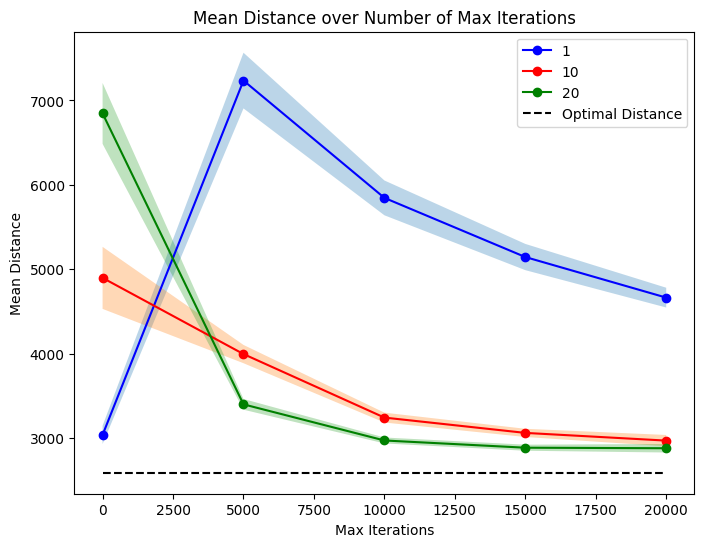

In [ ]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, chain_length in enumerate(chain_lengths):
    means = np.array([np.mean(elem) for elem in results_vary_chain_length[chain_length]])
    stds = np.array([np.std(elem) for elem in results_vary_chain_length[chain_length]])
    z_score = 1.96 

    conf_intervals = np.column_stack([
    means - z_score * (stds / np.sqrt(len(means))),
    means + z_score * (stds / np.sqrt(len(means)))
    ])

    lower_bounds = np.array([interval[0] for interval in conf_intervals])
    upper_bounds = np.array([interval[1] for interval in conf_intervals])

    plt.plot(max_iterations_list, means, marker='o', linestyle='-', color=colors[i], label=chain_length)
    plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.3)
    
opt_distance_line = [opt_distance_280 for _ in max_iterations_list]

plt.plot(max_iterations_list, opt_distance_line, linestyle='--', color='black', label='Optimal Distance')
plt.title('Mean Distance over Number of Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Mean Distance')
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(max_iterations_list, ci_radius, marker='o', linestyle='-', color='green')
# plt.xlabel('Max Iterations')
# plt.ylabel('CI Radius')
# plt.show()


In [ ]:
for chain_length in chain_lengths:
    save_data(results_vary_chain_length[chain_length], file_path=f'generated_data/dist_chain_length-{chain_length}_maxiter{max_iterations_list[-1]}.csv', 
            column_names=max_iterations_list, header='Distances (columns correspond to number of iterations)')

In [14]:
distances = distances_280
max_iterations = 50000
num_runs_list = [5, 10, 20, 50, 100]
final_temp = 1E-4
cooling_schedule = 'linear_m'
alpha = 1 - 1E-5

results_vary_numruns = {} 

for num_runs in num_runs_list:
    print('running for num_runs:', num_runs)
    output = run_simulations_concurrent(num_runs, distances, output='final_fitnesses', max_iterations=max_iterations,
                                                final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha)
    results_vary_numruns[num_runs] = output

running for num_runs: 5
running for num_runs: 10
running for num_runs: 20
running for num_runs: 50
running for num_runs: 100


In [ ]:
for num_runs in num_runs_list:
    save_data(results_vary_numruns[num_runs], file_path=f'generated_data/schedules/dist_chain_length-{num_runs}_maxiter{max_iterations_list[-1].csv', 
            column_names=max_iterations_list, header='Distances (columns correspond to number of iterations)')

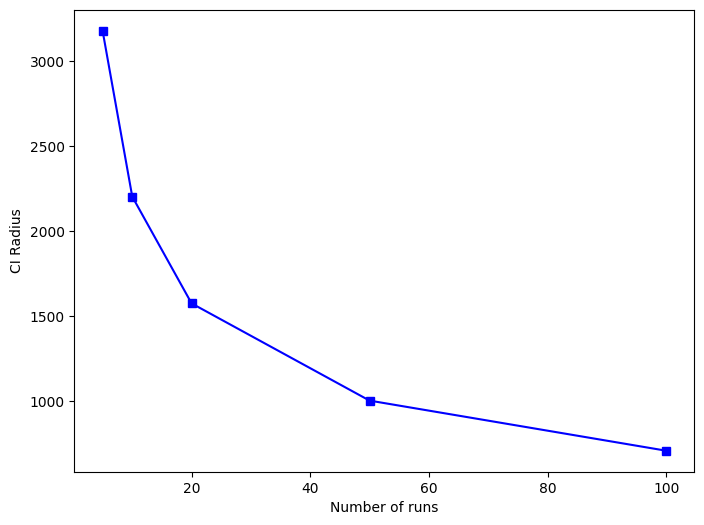

In [ ]:
plt.figure(figsize=(8, 6))

x, y = num_runs_list, []
for i, num_runs in enumerate(num_runs_list):
    mean = np.mean(results_vary_numruns[num_runs])
    std = np.mean(results_vary_numruns[num_runs])
    ci_radius = 1.96 * std / np.sqrt(len(results_vary_numruns[num_runs]))
    y.append(ci_radius)

plt.plot(x, y, 's-', color='blue')
    
plt.ylabel('CI Radius')
plt.xlabel('Number of runs')
plt.show()



In [104]:
schedules = ['linear_a', 'linear_m', 'exponential_m', 'quadratic_a', 'logarithmic_m']
alpha_list = [0.5, 7, 1-1E-3, 0.3, 5000]
max_iterations_list = range(1, 30200, 3500)

results_vary_schedules = {}
for i, schedule in enumerate(schedules):
    print(f'Running for schedule: {schedule}')
    output = run_vary_maxiter_concurrent_sims(num_runs=20, distances=distances_280, max_iterations_list=max_iterations_list,
                                         output='final_fitnesses', cooling_schedule=schedule, initial_temp=1E6, final_temp=1E-3, alpha=alpha_list[i], chain_length=3)
    results_vary_schedules[schedule] = output

Running for schedule: linear_a
Time taken (conc): 341.43977999687195
Running for schedule: linear_m
Time taken (conc): 343.14339089393616
Running for schedule: exponential_m
Time taken (conc): 315.453644990921
Running for schedule: quadratic_a
Time taken (conc): 338.8283791542053
Running for schedule: logarithmic_m
Time taken (conc): 348.481897354126


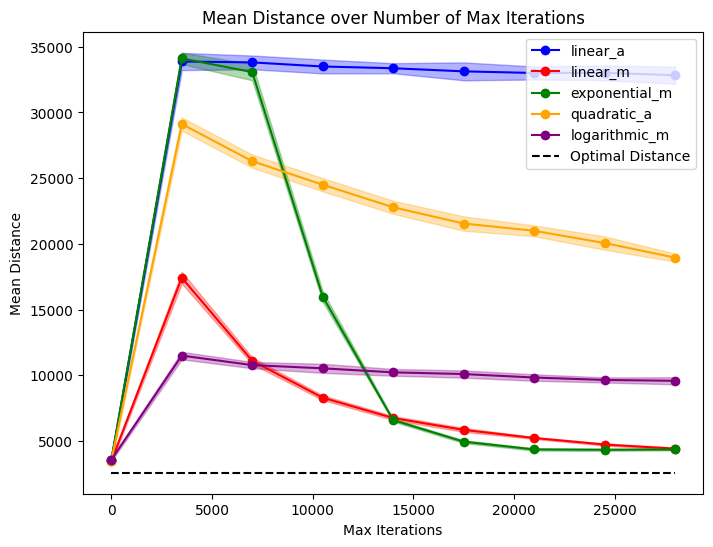

In [218]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'darkgreen', 'magenta']
for i, schedule in enumerate(schedules):
    # if schedule in ['linear_a', 'quadratic_a', 'dynamic_m']:
    #     continue
    means = np.array([np.mean(elem) for elem in results_vary_schedules[schedule]])
    stds = np.array([np.std(elem) for elem in results_vary_schedules[schedule]])
    z_score = 1.96 

    conf_intervals = np.column_stack([
    means - z_score * (stds / np.sqrt(len(means))),
    means + z_score * (stds / np.sqrt(len(means)))
    ])

    lower_bounds = np.array([interval[0] for interval in conf_intervals])
    upper_bounds = np.array([interval[1] for interval in conf_intervals])

    plt.plot(max_iterations_list, means, marker='o', linestyle='-', color=colors[i], label=schedule)
    plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.3, color=colors[i])
    
opt_distance_line = [opt_distance_280 for _ in max_iterations_list]

plt.plot(max_iterations_list, opt_distance_line, linestyle='--', color='black', label='Optimal Distance')
plt.title('Mean Distance over Number of Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Mean Distance')
plt.legend()
plt.show()

In [219]:
for schedule in schedules:
    save_data(results_vary_schedules[schedule], file_path=f'generated_data/schedules/dist_schedule-{schedule}_maxiter{max_iterations_list[-1]}.csv', 
            column_names=max_iterations_list, header='Distances (columns correspond to number of iterations)')

In [5]:
schedules = ['linear_m', 'exponential_m', 'logarithmic_m']
alpha_list = [np.linspace(0.1, 80, num=10), np.linspace(0.5, 0.999, num=10), np.linspace(1, 20000, num=10)]
max_iterations = 20000
results_vary_schedules_alpha = {}
for i, schedule in enumerate(schedules):
    output_temp_mean = []
    output_temp_conf = []
    for alpha in alpha_list[i]:
        output = run_simulations_concurrent(num_runs=10, distances=distances_280, output='fitness_statistics', max_iterations=max_iterations,
                                         cooling_schedule=schedule, final_temp=1E-3, initial_temp=1E5, alpha=alpha)
        output_temp_mean.append(output[0])
        output_temp_conf.append(output[2])

    results_vary_schedules_alpha[schedule] = [output_temp_mean, output_temp_conf]

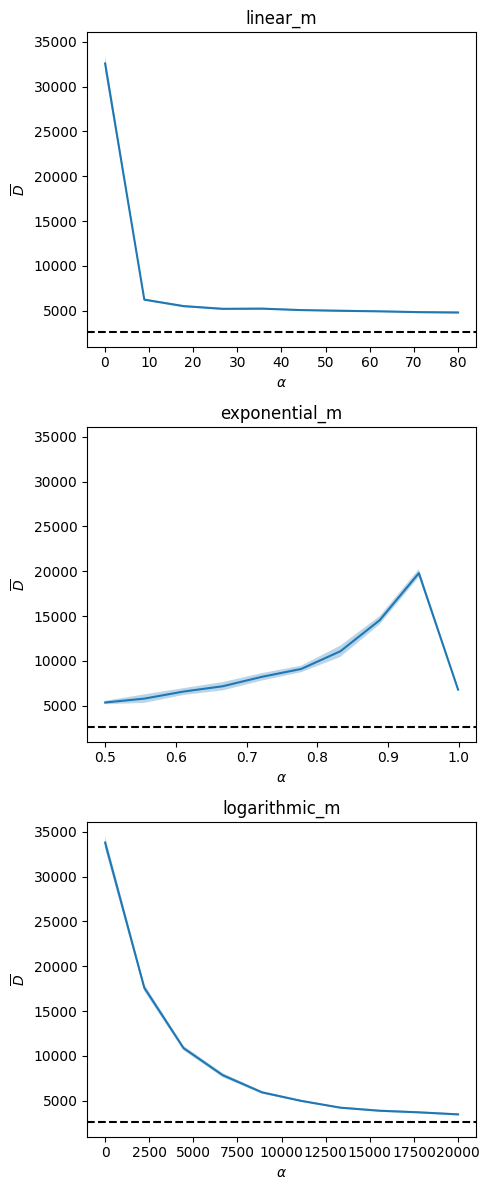

In [8]:
schedules = ['linear_m', 'exponential_m', 'logarithmic_m']
num_schedules = len(schedules)
alpha_list = [np.linspace(0.1, 80, num=10), np.linspace(0.5, 0.999, num=10), np.linspace(1, 20000, num=10)]

fig, axs = plt.subplots(num_schedules, 1, figsize=(5, 12), sharey=True) 

for i, schedule in enumerate(schedules):
    distances_alpha = results_vary_schedules_alpha[schedule][0]
    conf_inters_alpha = results_vary_schedules_alpha[schedule][1]
    alphas = alpha_list[i]
    
    lower_bounds = np.array([interval[0] for interval in conf_inters_alpha])
    upper_bounds = np.array([interval[1] for interval in conf_inters_alpha])

    axs[i].plot(alphas, distances_alpha)
    axs[i].fill_between(alphas, lower_bounds, upper_bounds, alpha=0.3)
    axs[i].set_title(schedule)
    axs[i].set_xlabel(r'$\alpha$')
    axs[i].set_ylabel(r'$\overline{D}$')
    axs[i].axhline(y=opt_distance_280, color='k', linestyle='--')

plt.tight_layout()
plt.savefig('figures/alpha_vs_D', dpi=300)
plt.show()





In [90]:
with open(f'generated_data/alpha/alpha_vs_dist.json', 'w') as file:
    json.dump(results_vary_schedules_alpha, file)

# MESA distance values

In [29]:
distances = distances_280
max_iterations_list = range(1, 20002, 5000)
num_runs = 20
final_temp = 1E-3
cooling_schedule = 'exponential_m'
alpha = 0.999
initial_temp = 1E6
chain_length = 3

results_mesa_chain_length = {}

sa_output = run_vary_maxiter_concurrent_sims(num_runs=num_runs, distances=distances_280, max_iterations_list=max_iterations_list, output='final_fitnesses', initial_temp=initial_temp,
                                                                            final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha, chain_length=chain_length)

mesa_output = run_vary_maxiter_concurrent_sims(num_runs=num_runs, distances=distances_280, max_iterations_list=max_iterations_list, output='final_fitnesses', initial_temp=initial_temp,
                                                                            final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha, 
                                                                            mesa=True, mesa_init_steps=1000, chain_length=chain_length)

results_mesa_chain_length['SA'] = sa_output
results_mesa_chain_length['MESA'] = mesa_output

Time taken (conc): 136.36167883872986
Time taken (conc): 135.00431895256042


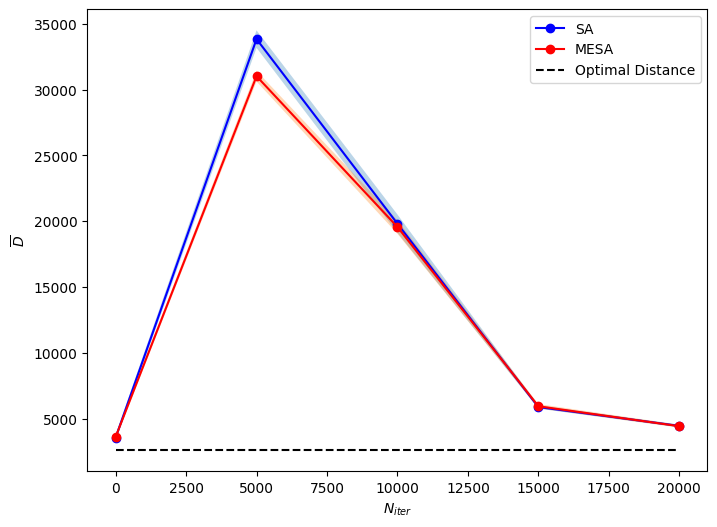

In [30]:
plot_comparison(results_mesa_chain_length, max_iterations_list, ['SA', 'MESA'], opt_distance_280)

plt.savefig(f'figures/sa_mesa_avg_chainlength-{chain_length}.png', dpi=300)
plt.show()

In [31]:
methods = ['SA', 'MESA']
for method in methods:
    save_data(results_mesa_chain_length[method], file_path=f'generated_data/mesa/dist-{method}_maxiter{max_iterations_list[-1]}.csv', 
            column_names=max_iterations_list, header='Distances (columns correspond to number of iterations)')

cooling schedule:  exponential_m
best_energy: 4435.953955731668
performed iterations: 20001
cooling schedule:  exponential_m
best_energy: 4297.054911874391
performed iterations: 20001


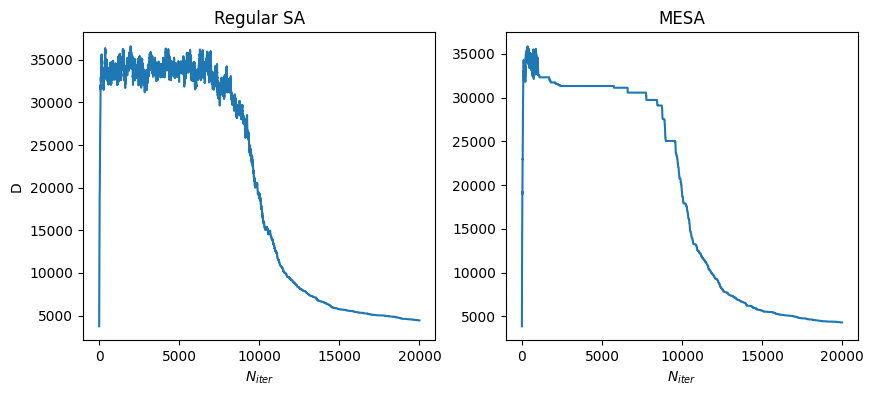

In [34]:
schedule = 'exponential_m'
_ , best_energy, costs, temps, count = perform_annealing(distances=distances_280, cooling_schedule=schedule, final_temp=final_temp, initial_temp=initial_temp,
                                                    alpha=alpha, chain_length=chain_length, max_iterations=max_iterations_list[-1], output_count=True)
print('cooling schedule: ', schedule)
print('best_energy:', best_energy)
print('performed iterations:', count[0])

_ , best_energy, costs2, temps, count = perform_annealing(distances=distances_280, cooling_schedule=schedule, final_temp=final_temp, initial_temp=initial_temp,
                                                    alpha = alpha, chain_length=chain_length, max_iterations=max_iterations_list[-1], 
                                                    output_count=True, mesa=True, mesa_init_steps=1000)
print('cooling schedule: ', schedule)
print('best_energy:', best_energy)
print('performed iterations:', count[0])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title('Regular SA')
axs[0].plot(costs)
axs[0].set_xlabel(r'$N_{iter}$')
axs[0].set_ylabel(r'D')
axs[1].set_title('MESA')
axs[1].plot(costs2)
axs[1].set_xlabel(r'$N_{iter}$')

plt.savefig('figures/sa_mesa_single_run.png', dpi=300)
plt.show()

cooling schedule:  linear_m
best_energy: 4403.382753293213
performed iterations: 50000
cooling schedule:  linear_m
best_energy: 4231.351347006898
performed iterations: 50000


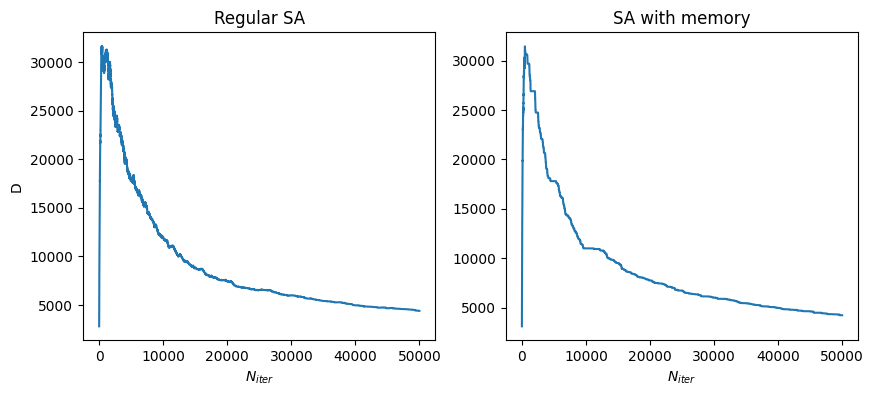

In [202]:
schedule = 'exponential_m'
_ , best_energy, costs, temps, count = perform_annealing(distances=distances_280, cooling_schedule=schedule, final_temp=1E-3, initial_temp=1E6,
                                                    alpha = 5, chain_length=1, max_iterations=50000, output_count=True, chain_length=chain_length)
print('cooling schedule: ', schedule)
print('best_energy:', best_energy)
print('performed iterations:', count[0])

_ , best_energy, costs2, temps, count = perform_annealing(distances=distances_280, cooling_schedule=schedule, final_temp=1E-3, initial_temp=1E6, chain_length=chain_length,
                                                    alpha = 5, chain_length=1, max_iterations=50000, output_count=True, mesa=True, mesa_init_steps=500)
print('cooling schedule: ', schedule)
print('best_energy:', best_energy)
print('performed iterations:', count[0])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title('Regular SA')
axs[0].plot(costs)
axs[0].set_xlabel(r'$N_{iter}$')
axs[0].set_ylabel(r'D')
axs[1].set_title('SA with memory')
axs[1].plot(costs2)
axs[1].set_xlabel(r'$N_{iter}$')
plt.savefig('figures/sa_mesa_alpha5.png', dpi=300)

plt.show()

# Acceptance ratio

In [22]:
def calculate_acceptance_ratios(distances, opt_distance_280, cooling_schedules, alpha, max_iterations=10000, 
                                num_runs=20, final_temp=1E-3, initial_temps=None):
    if initial_temps is None:
        initial_temps = [10**i for i in range(1, 10)]

    result_acceptance = {}
    for initial_temp in initial_temps:
        mean_acceptances = []
        mean_distances = []
        for schedule in cooling_schedules:
            result_temp = run_simulations_concurrent(num_runs, distances, max_iterations=max_iterations, output='full', initial_temp=initial_temp,
                                                     final_temp=final_temp, cooling_schedule=schedule, alpha=alpha, output_count=True)
            acceptances = [elem[1] / (elem[1] + elem[2]) for elem in result_temp[3]]
            final_distances = [elem[-1] for elem in result_temp[1]]
            mean_acceptances.append(np.mean(acceptances))
            mean_distances.append(np.mean(final_distances))

        result_acceptance[initial_temp] = (mean_acceptances, mean_distances)

    acc_ratios = []
    dists = []
    for x, y in list(result_acceptance.values()):
        x, y = x[0], y[0]
        acc_ratios.append(x)
        dists.append(y - opt_distance_280)

    return acc_ratios, dists

In [ ]:
initial_temps = [10**i for i in range(1, 10)]
acc_ratios_lin_1, dists_lin_1 = calculate_acceptance_ratios(distances_280, opt_distance_280, cooling_schedules=['linear_m'], alpha=1)
acc_ratios_lin_10, dists_lin_10 = calculate_acceptance_ratios(distances_280, opt_distance_280, cooling_schedules=['linear_m'], alpha=10)
acc_ratios_lin_30, dists_lin_30 = calculate_acceptance_ratios(distances_280, opt_distance_280, cooling_schedules=['linear_m'], alpha=30)


In [64]:
with open(f'generated_data/acceptance/acc_ratios_linear_m_1.json', 'w') as file:
    json.dump(acc_ratios_lin_1, file)

with open(f'generated_data/acceptance/acc_ratios_linear_m_10.json', 'w') as file:
    json.dump(acc_ratios_lin_10, file)

with open(f'generated_data/acceptance/acc_ratios_linear_m_30.json', 'w') as file:
    json.dump(acc_ratios_lin_30, file)

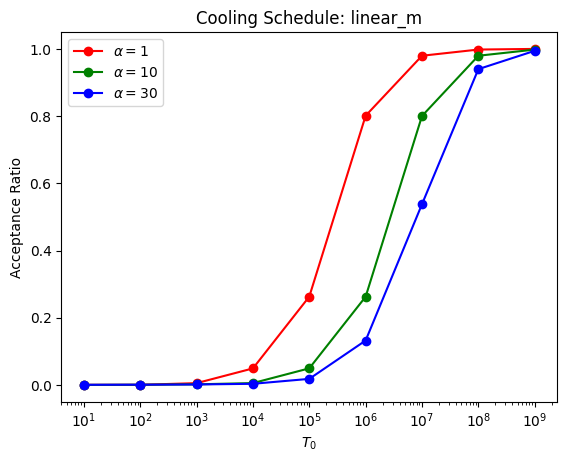

In [11]:
plt.figure()
plt.plot(initial_temps, acc_ratios_lin_1, 'ro-', label=r'$ \alpha = 1 $')
plt.plot(initial_temps, acc_ratios_lin_10, 'go-', label=r'$ \alpha = 10 $')
plt.plot(initial_temps, acc_ratios_lin_30, 'bo-', label=r'$ \alpha = 30 $')
plt.title('Cooling Schedule: linear_m')
plt.xlabel(r'$T_{0}$')
plt.ylabel('Acceptance Ratio')
plt.xscale('log')
plt.legend()
plt.savefig('figures/acceptance_linear_m.png', dpi=300)

In [61]:
initial_temps = [10**i for i in range(1, 10)]
acc_ratios_log_100, dists_lin_100 = calculate_acceptance_ratios(distances_280, opt_distance_280, cooling_schedules=['logarithmic_m'], alpha=100)
acc_ratios_log_500, dists_lin_500 = calculate_acceptance_ratios(distances_280, opt_distance_280, cooling_schedules=['logarithmic_m'], alpha=500)
acc_ratios_log_1000, dists_lin_1000 = calculate_acceptance_ratios(distances_280, opt_distance_280, cooling_schedules=['logarithmic_m'], alpha=1000)

In [65]:
with open(f'generated_data/acceptance/acc_ratios_log_m_100.json', 'w') as file:
    json.dump(acc_ratios_log_100, file)

with open(f'generated_data/acceptance/acc_ratios_log_m_500.json', 'w') as file:
    json.dump(acc_ratios_log_500, file)

with open(f'generated_data/acceptance/acc_ratios_log_m_1000.json', 'w') as file:
    json.dump(acc_ratios_log_1000, file)

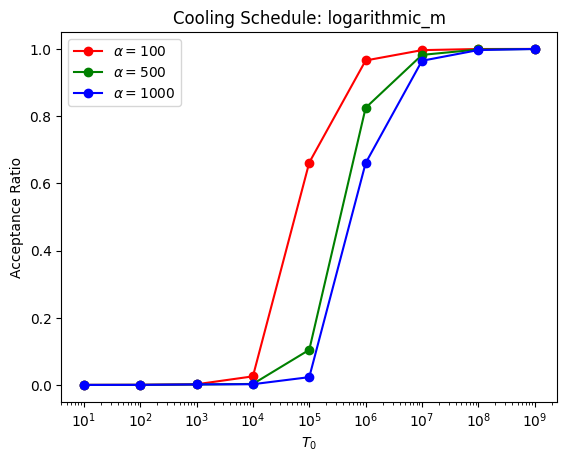

In [17]:
plt.figure()
plt.plot(initial_temps, acc_ratios_log_100, 'ro-', label=r'$ \alpha = 100 $')
plt.plot(initial_temps, acc_ratios_log_500, 'go-', label=r'$ \alpha = 500 $')
plt.plot(initial_temps, acc_ratios_log_1000, 'bo-', label=r'$ \alpha = 1000 $')
plt.title('Cooling Schedule: logarithmic_m')
plt.xlabel(r'$T_{0}$')
plt.ylabel('Acceptance Ratio')
plt.xscale('log')
plt.legend()
plt.savefig('figures/acceptance_logarithmic_m.png', dpi=300)

In [24]:
initial_temps = [10**i for i in range(1, 10)]
acc_ratios_exp_07, dists_exp_07 = calculate_acceptance_ratios(distances_280, opt_distance_280, cooling_schedules=['exponential_m'], alpha=0.7)
acc_ratios_exp_09, dists_exp_09 = calculate_acceptance_ratios(distances_280, opt_distance_280, cooling_schedules=['exponential_m'], alpha=0.9)
acc_ratios_exp_0999, dists_exp_0999 = calculate_acceptance_ratios(distances_280, opt_distance_280, cooling_schedules=['exponential_m'], alpha=0.999)

In [25]:
with open(f'generated_data/acceptance/acc_ratios_exp_m_07.json', 'w') as file:
    json.dump(acc_ratios_exp_07, file)

with open(f'generated_data/acceptance/acc_ratios_exp_m_09.json', 'w') as file:
    json.dump(acc_ratios_exp_09, file)

with open(f'generated_data/acceptance/acc_ratios_exp_m_0999.json', 'w') as file:
    json.dump(acc_ratios_exp_0999, file)

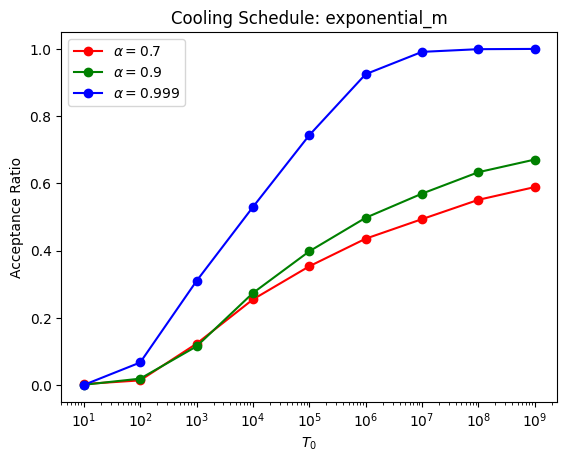

In [26]:
plt.figure()
plt.plot(initial_temps, acc_ratios_exp_07, 'ro-', label=r'$ \alpha = 0.7 $')
plt.plot(initial_temps, acc_ratios_exp_09, 'go-', label=r'$ \alpha = 0.9 $')
plt.plot(initial_temps, acc_ratios_exp_0999, 'bo-', label=r'$ \alpha = 0.999 $')
plt.title('Cooling Schedule: exponential_m')
plt.xlabel(r'$T_{0}$')
plt.ylabel('Acceptance Ratio')
plt.xscale('log')
plt.legend()
plt.savefig('figures/acceptance_exponential_m.png', dpi=300)

# Results of the best model

In [155]:
distances = distances_51
max_iterations = 50000
num_runs = 20
final_temp = 1E-3
initial_temp = 1E6
cooling_schedule = 'exponential_m'
alpha = 1 - 1E-3
chain_length = 10

results_best_estimation_51 = run_simulations_concurrent(num_runs=num_runs, distances=distances_51, max_iterations=max_iterations, output='fitness_statistics', initial_temp=initial_temp,
                                                                            final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha, chain_length=chain_length)

40 seconds

In [156]:
print(results_best_estimation_51)
print(opt_distance_51)

(444.26054706990226, 6.443433909301736, (441.16658633811164, 447.3545078016929))
447.79299344253565


In [157]:
distances = distances_280
max_iterations = 50000
num_runs = 20
final_temp = 1E-3
initial_temp = 1E6
cooling_schedule = 'exponential_m'
alpha = 1 - 1E-3
chain_length = 10

results_best_estimation_280 = run_simulations_concurrent(num_runs=num_runs, distances=distances_280, max_iterations=max_iterations, output='fitness_statistics', initial_temp=initial_temp,
                                                                            final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha, chain_length=chain_length)

174 seconds

In [158]:
print(results_best_estimation_280)
print(opt_distance_280)

(3189.1601029030408, 54.956649698211265, (3162.7714228125105, 3215.548782993571))
2586.7696475631606


In [159]:
distances = distances_442
max_iterations = 50000
num_runs = 20
final_temp = 1E-3
initial_temp = 1E6
cooling_schedule = 'exponential_m'
alpha = 1 - 1E-3
chain_length = 10

results_best_estimation_442 = run_simulations_concurrent(num_runs=num_runs, distances=distances_442, max_iterations=max_iterations, output='fitness_statistics', initial_temp=initial_temp,
                                                                            final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha, chain_length=chain_length)

270 seconds

In [162]:
print(results_best_estimation_442)
print(opt_distance_442)

(71636.30421109509, 953.2769907600542, (71178.56667278134, 72094.04174940885))
50783.54751373533


Best tour: [117 157 118 154  13  11  12  10   6   7   8 273 275 277 276 241 243 250
 255 254 211 223 221 219 203 199 194 142 136 271  24  22  18  15 134 137
 141 140 139 138 132  23 270   9  14 260 264 266 272 259   4 247   2   1
   0   3 279 278 242 240 248 251 256 257 258 261 206 209 249 231 244 245
 229 246 239 227 236 237 234 235 232 228 208 210 224 225 226 230 238 233
 218 217 216 222 220 215 212 202 214 213 205 207 253 252 269 268 204 201
 143 146 185 183 162 184 186 182 158 159 156 150 155 121 120 128 130 126
 125 153  30  29 123  27  31  32  28 124  34  49  50  36  51  52  48  55
  40  45 151 177 149 160 161 104 105 172 163 171 165 164 166 100 167  99
  92  71 116 115 112  59  60  56  69  63  62  95  97 101 102 168 169 106
 109 107 114  84  83  86 113  88 103 108  89  91  90 170  98  93  79  75
  96  94  78  76  72  74  77  80  81 110 111  87  66  67  68  85  58  57
  61  64  65  73  82  70  37  33  35  38  44  43  42  47  46  53  54  39
  41 119 176 173 174 181 187 190 191 189

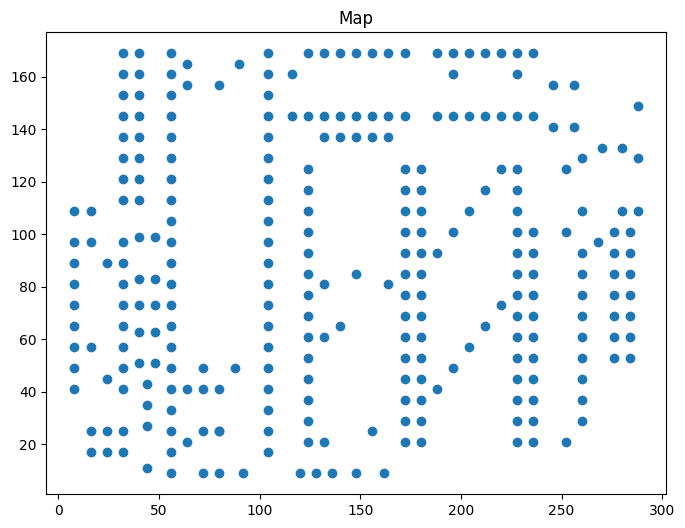

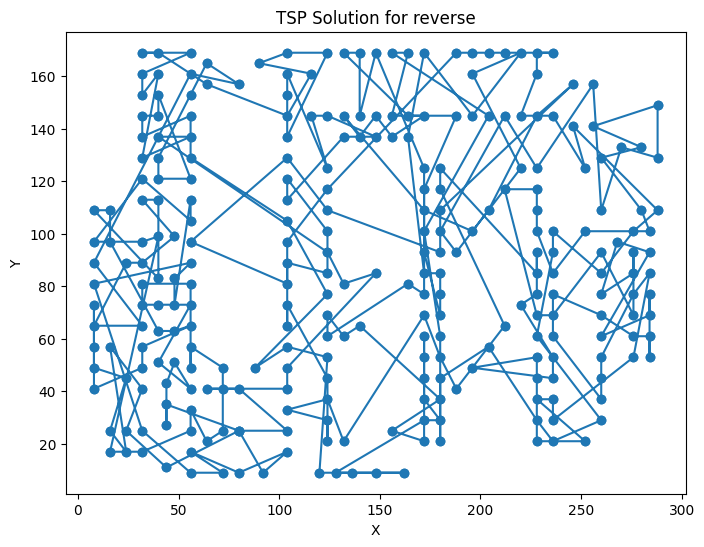

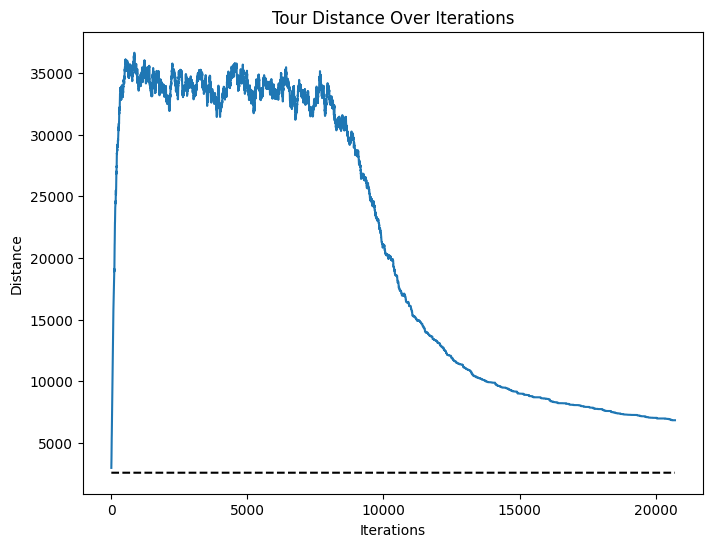

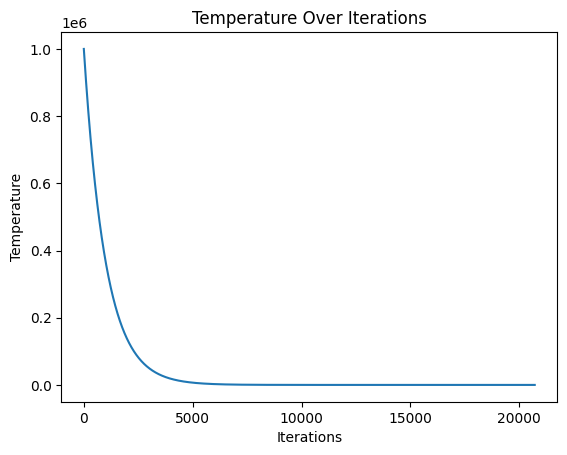

annealing iterations: [20715, 10065, 10649]


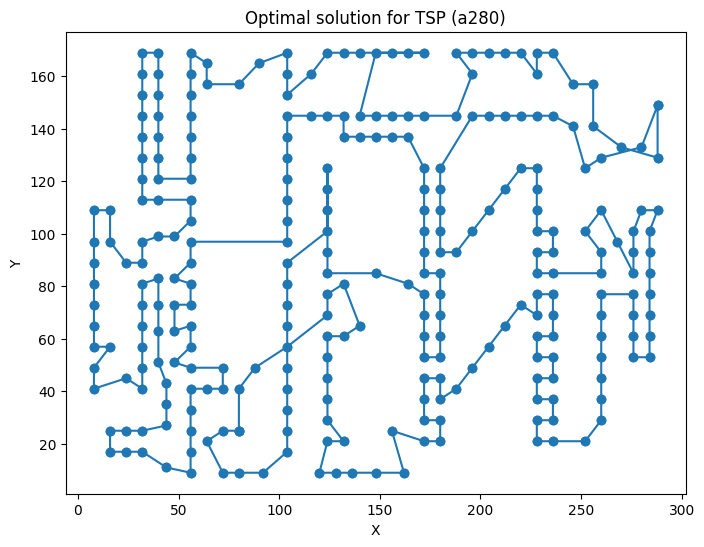

In [216]:
filepath = 'TSP-Configurations/a280.tsp.txt'
cities = load_graph(filepath)

max_iterations = 50000
final_temp = 1E-3
cooling_schedule = 'exponential_m'
alpha = 1 - 1E-3
chain_length = 10
initial_temp=initial_temp

plot_TSP_solution(cities, 'reverse', max_iterations=max_iterations, final_temp=final_temp, initial_temp=initial_temp,
                  cooling_schedule=cooling_schedule, alpha=alpha, opt_solution=opt_distance_280)

with open(filepath, 'r') as file:
    lines = file.readlines()

opt_tour_280 = lines[6:(len(lines) - 1)]
for i in range(len(opt_tour_280) - 1):
    opt_tour_280[i] = int(opt_tour_280[i].split()[0]) - 1
opt_tour_280[-1] = -1

num_cities = len(opt_tour_280)
tour_x = [cities[opt_tour_280[i]][0] for i in range(num_cities)]
tour_y = [cities[opt_tour_280[i]][1] for i in range(num_cities)]
plt.figure(figsize=(8, 6))
plt.scatter([city[0] for city in cities], [city[1] for city in cities])
plt.plot(tour_x + [tour_x[0]], tour_y + [tour_y[0]], 'o-')
plt.title("Optimal solution for TSP (a280)")
plt.xlabel("X")
plt.ylabel("Y")

plt.savefig('figures/opt_solution_280.png', dpi=300)

In [4]:
distances = distances_280
max_iterations = 50000
num_runs = 20
final_temp = 1E-3
initial_temp = 1E6
cooling_schedule = 'linear_m'
alpha = 10
chain_length = 10

results_best_estimation_442 = run_simulations_concurrent(num_runs=num_runs, distances=distances, max_iterations=max_iterations, output='fitness_statistics', initial_temp=initial_temp,
                                                                            final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha, chain_length=chain_length)


In [4]:
""" No concurrency """

distances = distances_280
max_iterations = 50000
num_runs = 20
final_temp = 1E-3
initial_temp = 1E6
cooling_schedule = 'exponential_m'
alpha = 1 - 1E-3
chain_length = 10

start_time = time.time()
results_best_estimation_280 = run_simulations(num_runs=num_runs, distances=distances_280, max_iterations=max_iterations, output='fitness_statistics', initial_temp=initial_temp,
                                                                            final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha, chain_length=chain_length)
end_time = time.time()
print(f'Time taken (no concurrecy): {end_time-start_time}')

Time taken (no concurrecy): 479.40829730033875


480 seconds